In [ ]:
import sys
import logging

import pymc3 as pm
import numpy as np
import pandas as pd

logging.basicConfig(level=logging.INFO, stream=sys.stdout,
                    format='[%(asctime)s][%(levelname)s]: %(message)s')

In [ ]:
rng = np.random.RandomState(42)
num_samples = 100

sample1 = rng.normal(0, 1, size=num_samples)
sample2 = rng.normal(1, 1, size=num_samples)
diff = sample1 - sample2

In [4]:
sigma_low = diff.std() * 1 / 100
sigma_high = diff.std() * 100

with pm.Model():
    group_mean = pm.Normal('group_mean', diff.mean(), diff.std() * 2)
    group_std = pm.Uniform('group_std', lower=sigma_low, upper=sigma_high)
    v = pm.Exponential('v_minus_one', 1 / 29.) + 1
    pm.StudentT('result', nu=v, mu=group_mean, sd=group_std, observed=diff)
    trace = pm.sample(num_samples)

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [v_minus_one_log__, group_std_interval__, group_mean]
100%|██████████| 600/600 [00:03<00:00, 159.20it/s]


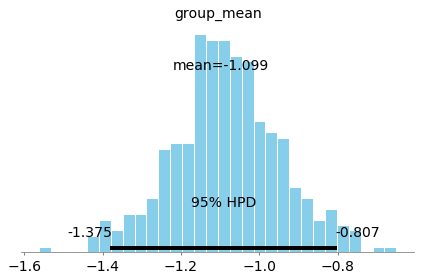

In [11]:
axes = pm.plot_posterior(
    trace, varnames=['group_mean'], color='#87ceeb', text_size=14)

In [14]:
class BESTPairedT:
    """Kruschke's BEST (Bayesian Estimation Superseded t-Test) model."""
    
    def __init__(self, num_samples=1000):
        self.num_samples = 1000

        self.trace_ = None

    def fit(self, diff):
        sigma_low = diff.std() * 1 / 100
        sigma_high = diff.std() * 100

        with pm.Model():
            group_mean = pm.Normal('group_mean', diff.mean(), diff.std() * 2)
            group_std = pm.Uniform('group_std', lower=sigma_low, upper=sigma_high)
            v = pm.Exponential('v_minus_one', 1 / 29.) + 1
            pm.StudentT('result', nu=v, mu=group_mean, sd=group_std, observed=diff)
            self.trace_ = pm.sample(self.num_samples)

        return self

    def plot(self, **kwargs):
        kwargs.setdefault('color', '#87ceeb')
        kwargs.setdefault('text_size', 14)
        return pm.plot_posterior(
            self.trace_, varnames=['group_mean'], **kwargs)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [v_minus_one_log__, group_std_interval__, group_mean]
100%|██████████| 1500/1500 [00:05<00:00, 290.51it/s]
The acceptance probability does not match the target. It is 0.8878666264284066, but should be close to 0.8. Try to increase the number of tuning steps.


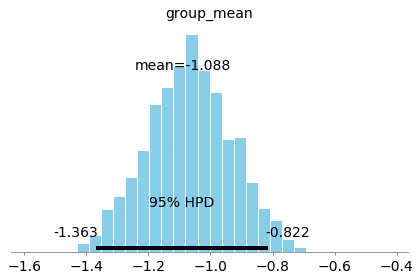

In [15]:
model = BESTPairedT().fit(diff)
model.plot()